In [46]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datatype_transformations import DataTransform
from DataFrameTransform import DataFrameTransform 

# Load data into df
df = pd.read_csv('C:/Users/Lara/.vscode/EDA_project_customer_loans_in_finance/milestone_1/loan_payments.csv')
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [34]:
date_columns = ['issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date']


df[date_columns] = df[date_columns].apply(lambda col: pd.to_datetime(col, errors='coerce'))

C:\Users\Lara\AppData\Local\Temp\ipykernel_20424\330546238.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_columns] = df[date_columns].apply(lambda col: pd.to_datetime(col, errors='coerce'))
C:\Users\Lara\AppData\Local\Temp\ipykernel_20424\330546238.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_columns] = df[date_columns].apply(lambda col: pd.to_datetime(col, errors='coerce'))
C:\Users\Lara\AppData\Local\Temp\ipykernel_20424\330546238.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_columns] = df[date_columns].apply(lambda col: pd.to_dat

In [35]:

threshold_fraction = 0.5

threshold = int((1-threshold_fraction)*len(df))

df = df.dropna(axis = 1, thresh= threshold)

In [36]:
columns_to_impute_randomly = ['term', 'employment_length', 'last_credit_pull_date', 'last_payment_date', 'collections_12_mths_ex_med']

# Function to impute random values based on the distribution
def impute_randomly(column):
    null_indices = column.isnull()
    num_nulls = null_indices.sum()
    if num_nulls > 0:
        non_null_values = column.dropna()
        random_values = np.random.choice(non_null_values, size=num_nulls)
        column.loc[null_indices] = random_values
    return column


# Apply the function to each specified column
for column in columns_to_impute_randomly:
    df[column] = impute_randomly(df[column])

C:\Users\Lara\AppData\Local\Temp\ipykernel_20424\3362785878.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column.loc[null_indices] = random_values


KeyError: 'last_credit_pull_date'

In [ ]:
columns_to_impute_mean = [ 'int_rate', 'funded_amount']

for column in columns_to_impute_mean:
    df[column].fillna(df[column].mean(), inplace=True)

# Task 1: Current State of the Loans



In [ ]:
# Calculate basic loan summary information

percentage_recovered_inv = round((df['out_prncp_inv'] == 0).mean() * 100, 2)
total_funded = df['funded_amount'].sum()
total_recovered_inv = df[df['out_prncp_inv'] == 0]['total_rec_prncp'].sum()  

total_recovery_percentage = (total_recovered_inv / total_funded) * 100

display(f'The percentage of loans recovered against the investor funding is {percentage_recovered_inv}%')
display(f'The overall recovery percentage is {total_recovery_percentage:.2f}%')
display(f'The total amount funded is {total_funded:,}')

'The percentage of loans recovered against the investor funding is 62.62%'

'The overall recovery percentage is 52.69%'

'The total amount funded is 677,668,375.0'

In [ ]:
# Calculate the percentage of loans recovered in 6 months
df['remaining_in_6mths'] = ''
for index, row in df.iterrows():
    value = row['out_prncp'] 
    mths = 6
    while mths > 0:
        value = (value * (1+(row['int_rate']/12/100))) - row['instalment'] 
        mths -= 1 
    
    df.at[index, 'remaining_in_6mths'] = value 


df['remaining_in_6mths'] = np.where(df['remaining_in_6mths']<=0,0,df['remaining_in_6mths'])  

#calculate total funds returned after 6 months
funds_returned_6mths = round(((df['remaining_in_6mths'].sum() + df['out_prncp_inv'].sum()) / df['funded_amount_inv'].sum())*100,2)

df['status_6mths'] = np.where(df['remaining_in_6mths']>0,"Open","Recovered")  



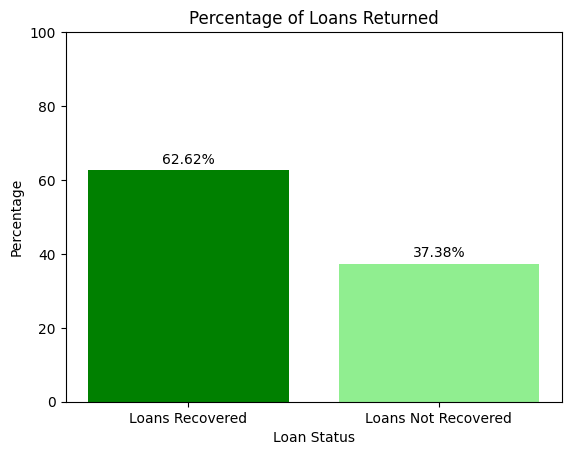

In [ ]:
# Visualise the basic loans information in a bar chart

labels = ['Loans Recovered', 'Loans Not Recovered']
values = [percentage_recovered_inv, 100 - percentage_recovered_inv]


plt.bar(labels, values, color=['green', 'lightgreen'])
plt.ylim(0, 100) 
plt.xlabel('Loan Status')
plt.ylabel('Percentage')
plt.title('Percentage of Loans Returned')

for i, value in enumerate(values):
    plt.text(i, value + 1, f'{value}%', ha='center', va='bottom')

plt.show()



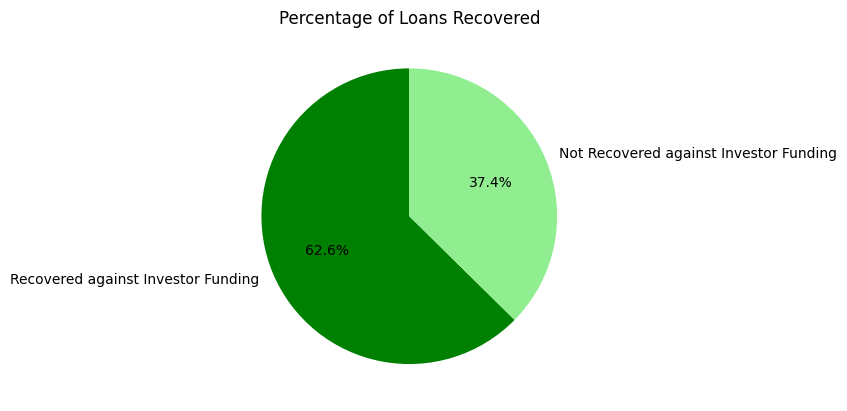

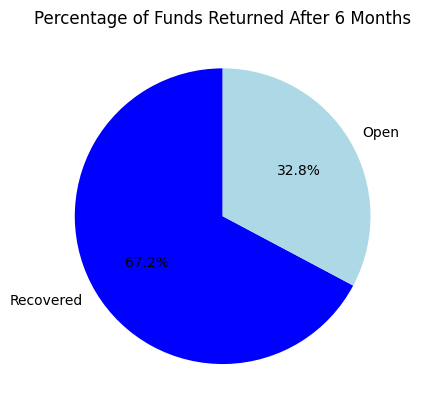

In [ ]:
# Visualise the basic loans information in a pie chart 
labels = ['Recovered against Investor Funding', 'Not Recovered against Investor Funding']
sizes = [percentage_recovered_inv, 100 - percentage_recovered_inv]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['green', 'lightgreen'], startangle=90)
plt.title('Percentage of Loans Recovered')
plt.show()
# 
loan_status_counts = df['status_6mths'].value_counts()
loan_status_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue', 'lightblue'])
plt.title('Percentage of Funds Returned After 6 Months')
plt.ylabel('')
plt.show()

# Task 2: Calculating Loss

In [ ]:
# Calculate the percentage of charged off loans  and the total amount that was paid towards these loans before being charged off

charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Calculate the percentage of charged-off loans
percentage_charged_off = (len(charged_off_loans) / len(df)) * 100

# Calculate the total amount paid towards charged-off loans
total_amount_paid_charged_off = charged_off_loans['loan_amount'].sum()

display(f"Percentage of Charged Off Loans: {percentage_charged_off:.2f}%")
display(f"Total Amount for Charged Off Loans: {total_amount_paid_charged_off:,}")

'Percentage of Charged Off Loans: 10.27%'

'Total Amount Paid Towards Charged Off Loans: 76,359,400'

# Task 3: Calculating Projected Loss

In [ ]:
# Filter for charged off loans
charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Calculate the percentage of charged off loans
charged_off_percentage = (charged_off_loans.shape[0] / df.shape[0]) * 100

# Calculate the total amount paid towards charged off loans
total_paid_charged_off = charged_off_loans['total_payment'].sum()

# Filter the dataset for charged-off loans
charged_off_loans = df[df['loan_status'] == 'Charged Off'].copy()

#  Calculate the projected loss for each charged-off loan
charged_off_loans['projected_loss'] = charged_off_loans['funded_amount'] - (
    charged_off_loans['recoveries'] + charged_off_loans['collection_recovery_fee']
)

Percentage of Charged Off Loans: 10.27%
Total Amount Paid towards Charged Off Loans: $37400589.04


In [ ]:

charged_off_loans['loan_amount'] = pd.to_numeric(charged_off_loans['loan_amount'], errors='coerce')

# Check for non-numeric values after conversion
non_numeric_values = charged_off_loans['loan_amount'][charged_off_loans['loan_amount'].isna()]
if not non_numeric_values.empty:
    print(f"Non-numeric values found in 'loan_amount': {non_numeric_values}")

# Calculate Monthly Revenue Loss 
charged_off_loans['monthly_revenue'] = (charged_off_loans['loan_amount'] * charged_off_loans['int_rate']) / 12

# Filter Charged Off Loans and create a copy
charged_off_loans = df[df['loan_status'] == 'Charged Off'].copy()

# Check if there are Charged Off loans
if charged_off_loans.empty:
    print("No Charged Off loans found.")
else:
    # Calculate Projected Loss
    charged_off_loans['projected_loss'] = charged_off_loans['out_prncp'] + charged_off_loans['total_rec_int']
    total_projected_loss = charged_off_loans['projected_loss'].sum()

    # Calculate Monthly Revenue Loss
    charged_off_loans['monthly_revenue'] = (charged_off_loans['loan_amount'] * charged_off_loans['int_rate']) / 12
    total_revenue_loss = (charged_off_loans['monthly_revenue'] * charged_off_loans['term']).sum()

    # Visualize the Loss
    # Time Series Visualization
    charged_off_loans['remaining_months'] = charged_off_loans['term']
    plt.plot(charged_off_loans['remaining_months'], charged_off_loans['projected_loss'])
    plt.xlabel('Remaining Months')
    plt.ylabel('Projected Loss')
    plt.title('Projected Loss Over Remaining Term')
    plt.show()

    # Cumulative Loss Visualization
    charged_off_loans['cumulative_loss'] = charged_off_loans['projected_loss'].cumsum()
    plt.plot(charged_off_loans['remaining_months'], charged_off_loans['cumulative_loss'])
    plt.xlabel('Remaining Months')
    plt.ylabel('Cumulative Loss')
    plt.title('Cumulative Loss Over Remaining Term')
    plt.show()

    # Interpretation
    display(f'Total Projected Loss: ${total_projected_loss}')
    display(f'Total Revenue Loss: ${total_revenue_loss}')

TypeError: can't multiply sequence by non-int of type 'float'

# Task 4: Possible loss

In [44]:
charged_off_loans = df[df['loan_status'] == 'Charged Off']

# Step 2: Calculate Total Losses for Charged-Off Loans
total_lost_charged_off = (
    charged_off_loans['recoveries'] +
    charged_off_loans['collection_recovery_fee'] +
    charged_off_loans['total_rec_late_fee']
).sum()

late_status = ['Late (31-120 days)', 'Late (16-30 days)', 'Default']

late_accounts = len(df[df['loan_status'].isin(late_status)])

display(f'{late_accounts} accounts are currently behind with their payments, this is {round(late_accounts/len(df), 2)*100}% of all accounts.')

potential_late_losses = df.query('loan_status in @late_status')['loan_amount'].sum() - df.query('loan_status in @late_status')['total_payment'].sum()

total_loan_revenue = df['loan_amount'].sum()

late_and_charged_total = round(((potential_late_losses + total_lost_charged_off) / total_loan_revenue), 2)

display(f'\nThe projected losses due to late accounts converting to "Charged off" status is {round(potential_late_losses, 2):,}')

display(f'Should the late accounts become charged off, this would take the total revenue loss to {round(potential_late_losses + total_lost_charged_off, 2):,}')

738 accounts are currently behind with their payments, this is 1.0% of all accounts.

The projected losses due to late accounts converting to "Charged off" status is 3,667,734.57
Should the late accounts become charged off, this would take the total revenue loss to 9,072,754.32


# Task 5: Indicators of loss

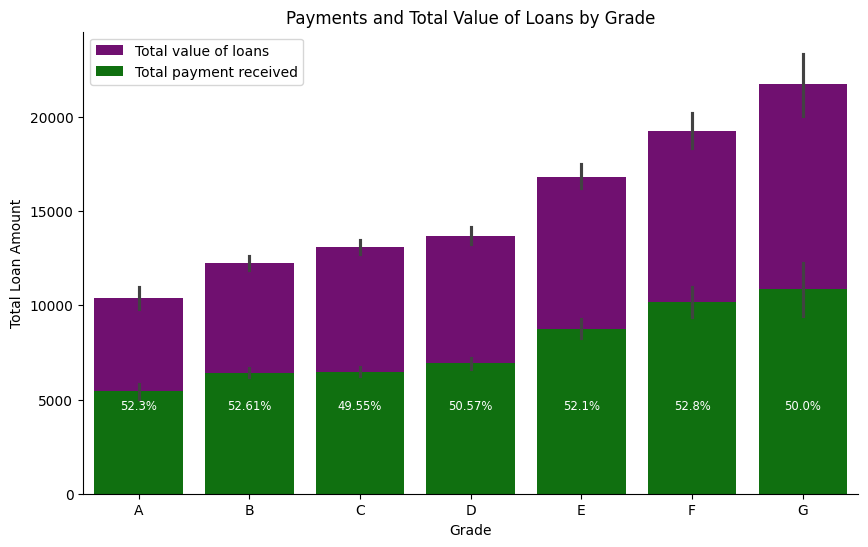

In [54]:
# dataframe of late and charged off loans only
late_and_co = df[df['loan_status'].isin(['Charged Off'] + late_status)]

# grade order to sequence correctly in plots
grade_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

# Create a bar chart
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='grade', y='loan_amount', data=late_and_co, color='purple', label='Total value of loans', order=grade_order)
ax2 = sns.barplot(x='grade', y='total_payment', data=late_and_co, color='green', label='Total payment received', order=grade_order)

# list of values to be added as annotations to the plot (% of funds returned vs those loaned)
percents = []
for grade in grade_order:
    total_loan_amount = late_and_co.loc[late_and_co['grade'] == grade, 'loan_amount'].sum()
    total_payment = late_and_co.loc[late_and_co['grade'] == grade, 'total_payment'].sum()
    percents.append(round((total_payment / total_loan_amount) * 100, 2))

# Add annotations to the graph
percent_pos = range(len(percents))
percent_label = [f"{percent}%" for percent in percents]
for tick, label in zip(percent_pos, ax2.get_xticklabels()):
    ax2.text(tick, 4500, percent_label[tick], horizontalalignment='center', size="small", color="white")

ax2.set(xlabel="Grade", ylabel="Total Loan Amount", title="Payments and Total Value of Loans by Grade")
sns.despine()
plt.legend()
plt.show()

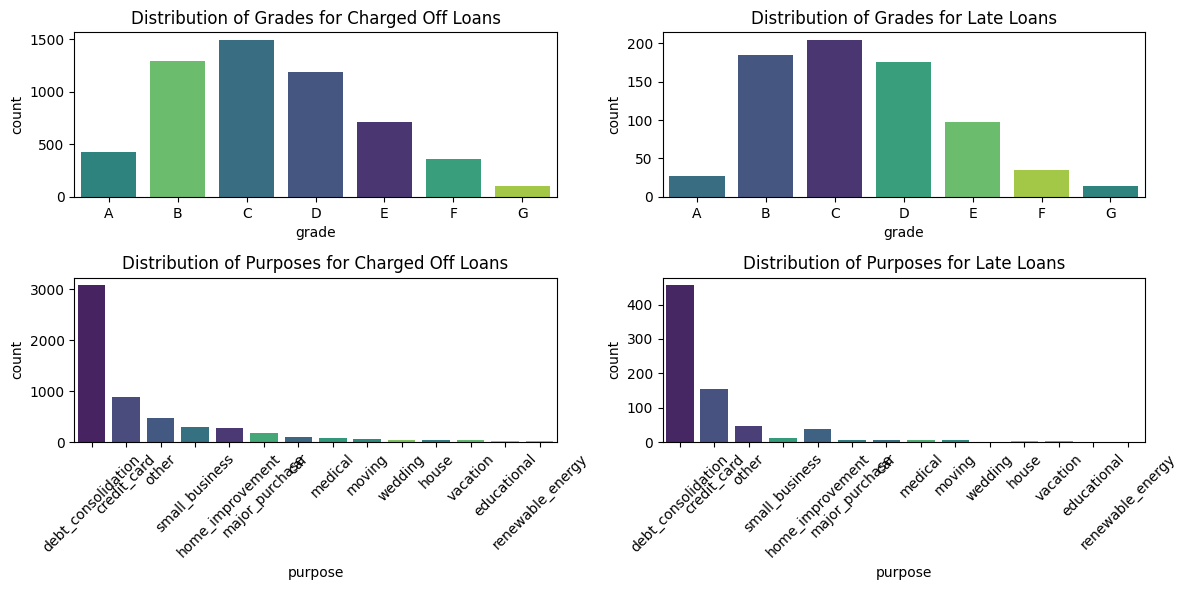

In [52]:
# Create subsets
charged_off_loans = df[df['loan_status'] == 'Charged Off']
late_status = ['Late (31-120 days)', 'Late (16-30 days)', 'Default']
late_loans = df[df['loan_status'].isin(late_status)]

# Compare relevant columns

plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(x='grade', hue='grade', data=charged_off_loans, order=charged_off_loans['grade'].sort_values().unique(), palette='viridis', legend=False)
plt.title('Distribution of Grades for Charged Off Loans')

plt.subplot(2, 2, 2)
sns.countplot(x='grade', hue='grade', data=late_loans, order=charged_off_loans['grade'].sort_values().unique(), palette='viridis', legend=False)
plt.title('Distribution of Grades for Late Loans')

plt.subplot(2, 2, 3)
sns.countplot(x='purpose', hue='purpose', data=charged_off_loans, order=charged_off_loans['purpose'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Purposes for Charged Off Loans')
plt.xticks(rotation=45)

plt.subplot(2, 2, 4)
sns.countplot(x='purpose', hue='purpose', data=late_loans, order=charged_off_loans['purpose'].value_counts().index, palette='viridis', legend=False)
plt.title('Distribution of Purposes for Late Loans')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()